![Texto Alternativo](https://pm1.aminoapps.com/6142/8bdd665485e80e32de9b44257ff3998356a07297_00.jpg)



# **ANÁLISE DA PREMIER LEAGUE 2006/2007 - 2017/2018**
Nesse projeto, vou analisar os dados da Premier League. Uma das Ligas mais importantes e de destaque no mundo. Unindo minha paixão por análise e futebol.Os dados foram adquiridos no site da Premier League e são representativos das temporadas 2006/2007 a 2017/2018.

In [1]:
import pandas as pd

In [2]:
premierleague = pd.read_csv('stats.csv')

In [3]:
premierleague.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    float64
 2   losses                240 non-null    float64
 3   goals                 240 non-null    float64
 4   total_yel_card        240 non-null    float64
 5   total_red_card        240 non-null    float64
 6   total_scoring_att     240 non-null    float64
 7   ontarget_scoring_att  240 non-null    float64
 8   hit_woodwork          240 non-null    float64
 9   att_hd_goal           240 non-null    float64
 10  att_pen_goal          240 non-null    float64
 11  att_freekick_goal     240 non-null    float64
 12  att_ibox_goal         240 non-null    float64
 13  att_obox_goal         240 non-null    float64
 14  goal_fastbreak        240 non-null    float64
 15  total_offside         2

In [4]:
premierleague.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


# **3 Melhores equipes com melhor desempenho**

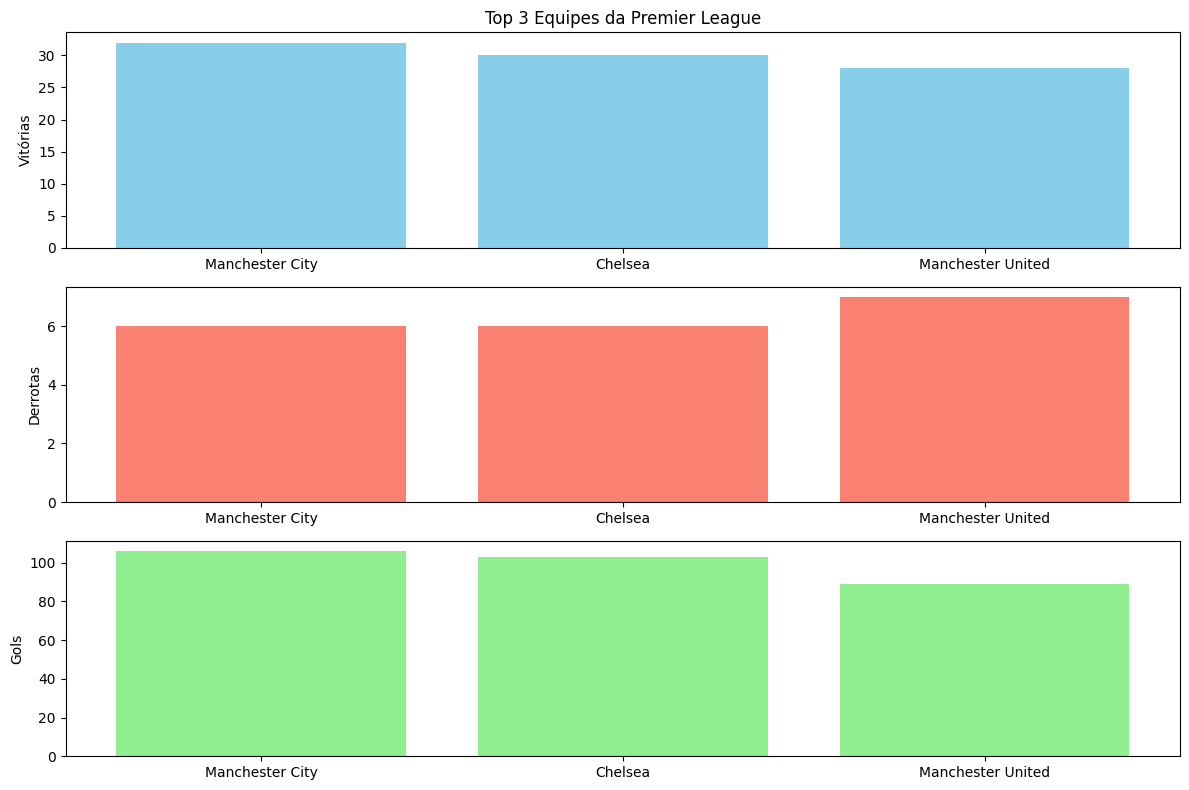

In [23]:
import matplotlib.pyplot as plt

top_3_equipes = premierleague.nlargest(10, ['wins', 'losses', 'goals'])

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.bar(top_3_equipes['team'], top_3_equipes['wins'], color='skyblue')
plt.ylabel('Vitórias')
plt.title('Top 3 Equipes da Premier League')

plt.subplot(3, 1, 2)
plt.bar(top_3_equipes['team'], top_3_equipes['losses'], color='salmon')
plt.ylabel('Derrotas')

plt.subplot(3, 1, 3)
plt.bar(top_3_equipes['team'], top_3_equipes['goals'], color='lightgreen')
plt.ylabel('Gols')

plt.tight_layout()

plt.show()


# **Equipes com mais gols feitos**

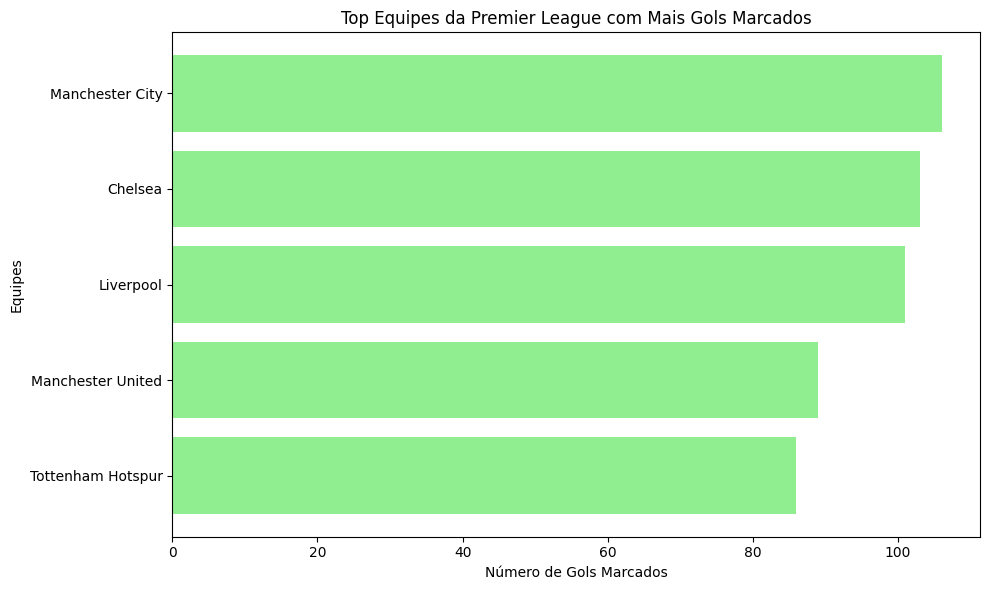

In [27]:
import matplotlib.pyplot as plt

top_10_gols_feitos = premierleague.nlargest(10, 'goals')

plt.figure(figsize=(10, 6))
plt.barh(top_10_gols_feitos['team'], top_10_gols_feitos['goals'], color='lightgreen')
plt.xlabel('Número de Gols Marcados')
plt.ylabel('Equipes')
plt.title('Top Equipes da Premier League com Mais Gols Marcados')
plt.gca().invert_yaxis()
plt.tight_layout()


plt.show()


# **Equipes com mais derrotas**

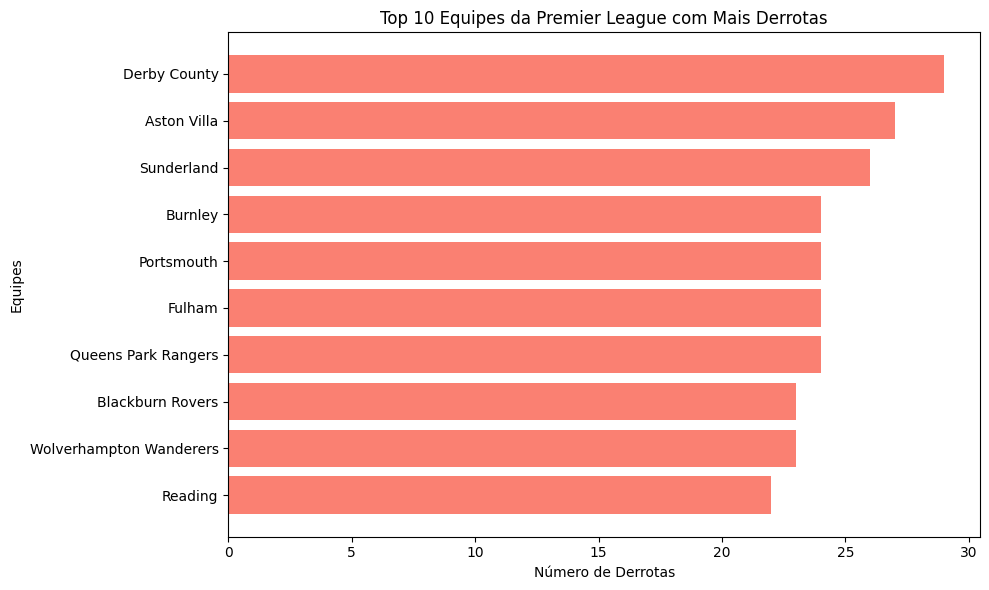

In [25]:
import matplotlib.pyplot as plt

top_10_derrotas = premierleague.nlargest(10, 'losses')

plt.figure(figsize=(10, 6))
plt.barh(top_10_derrotas['team'], top_10_derrotas['losses'], color='salmon')
plt.xlabel('Número de Derrotas')
plt.ylabel('Equipes')
plt.title('Top 10 Equipes da Premier League com Mais Derrotas')
plt.gca().invert_yaxis()
plt.tight_layout()


plt.show()


# **Qual é a média de vitórias por equipe?**

In [ ]:
media_vitorias_por_equipe = premierleague['wins'].mean()
print("A média de vitórias por equipe na Premier League é:", media_vitorias_por_equipe)

A média de vitórias por equipe na Premier League é: 14.15


# **Existe uma correlação entre o número de gols marcados e o número de vitórias?**

In [ ]:
correlacao_gols_vitorias = premierleague['goals'].corr(premierleague['wins'])

print("O coeficiente de correlação entre gols marcados e número de vitórias é:", correlacao_gols_vitorias)


O coeficiente de correlação entre gols marcados e número de vitórias é: 0.8992362728131303


há uma tendência significativa de que equipes que marcam mais gols também tenham mais vitórias.

# **Quais equipes têm o maior número de cartões amarelos e vermelhos acumulados?**

In [ ]:
premierleague['total_cards'] = premierleague['total_yel_card'] + premierleague['total_red_card']

total_cartoes_por_equipe = premierleague.groupby('team')['total_cards'].sum()

equipes_mais_cartoes = total_cartoes_por_equipe.sort_values(ascending=False)

print("Equipes com o maior número de cartões amarelos e vermelhos acumulados:")
print(equipes_mais_cartoes)


Equipes com o maior número de cartões amarelos e vermelhos acumulados:
team
West Ham United             775.0
Manchester City             767.0
Chelsea                     756.0
Manchester United           751.0
Sunderland                  736.0
Arsenal                     725.0
Tottenham Hotspur           716.0
Stoke City                  710.0
Everton                     704.0
Aston Villa                 677.0
Newcastle United            669.0
Liverpool                   666.0
West Bromwich Albion        599.0
Wigan Athletic              479.0
Blackburn Rovers            439.0
Bolton Wanderers            433.0
Fulham                      425.0
Swansea City                382.0
Southampton                 354.0
Hull City                   352.0
Crystal Palace              338.0
Middlesbrough               290.0
Watford                     279.0
Burnley                     257.0
Norwich City                250.0
Portsmouth                  243.0
Leicester City              234.0
Birmin

# **Qual é a eficácia das tentativas de gol, medido pelo número de gols marcados em relação ao total de tentativas de gol?**

In [ ]:
premierleague['eficacia_gols'] = premierleague['goals'] / premierleague['total_scoring_att']

media_eficacia_gols = premierleague['eficacia_gols'].mean()

print("A eficácia média das tentativas de gol na Premier League é de:", media_eficacia_gols)


A eficácia média das tentativas de gol na Premier League é de: 0.09823131038881541


em média, cerca de 9.8% das tentativas de gol resultam em gols na Premier League, com base nos dados fornecidos. Essa taxa relativamente baixa pode indicar que pode haver espaço para melhorias nas habilidades de finalização das equipes ou em suas estratégias ofensivas para criar oportunidades de gol mais claras.

# **Há uma correlação entre o número de gols marcados em jogadas de bola parada (faltas, pênaltis, etc.) e o sucesso da equipe?**

In [ ]:
correlacao = premierleague['att_freekick_goal'].corr(premierleague['wins'])

print("Correlação entre gols marcados em jogadas de bola parada e número de vitórias:", correlacao)


Correlação entre gols marcados em jogadas de bola parada e número de vitórias: 0.2966961912691831


Correlação positiva fraca entre o número de gols marcados em jogadas de bola parada e o sucesso da equipe. No entanto, equipes que marcam mais gols em jogadas de bola parada podem ter um sucesso ligeiramente maior em termos de vitórias.

# **Qual é a porcentagem de chutes ao gol que atingiram a trave?**

In [ ]:
porcentagem_trave = (premierleague['hit_woodwork'].sum() / premierleague['total_scoring_att'].sum()) * 100

print("Porcentagem de chutes na trave na Premier League:", porcentagem_trave, "%")


Porcentagem de chutes na trave na Premier League: 2.3886305077055208 %


# **Quais equipes têm o maior número de gols marcados em contra-ataques?**

In [ ]:
gols_contra_ataque_por_equipe = premierleague.groupby('team')['goal_fastbreak'].sum()

equipes_mais_gols_contra_ataque = gols_contra_ataque_por_equipe.sort_values(ascending=False)

print("Equipes com o maior número de gols marcados em contra-ataques:")
print(equipes_mais_gols_contra_ataque)


Equipes com o maior número de gols marcados em contra-ataques:
team
Manchester City             69.0
Tottenham Hotspur           65.0
Arsenal                     60.0
Manchester United           57.0
Liverpool                   49.0
Chelsea                     45.0
Aston Villa                 41.0
Everton                     35.0
Newcastle United            29.0
Sunderland                  28.0
West Ham United             25.0
West Bromwich Albion        23.0
Leicester City              20.0
Wigan Athletic              18.0
Fulham                      16.0
Stoke City                  14.0
Hull City                   13.0
Middlesbrough               12.0
Portsmouth                  12.0
Bolton Wanderers            10.0
Blackburn Rovers            10.0
Southampton                  9.0
Swansea City                 8.0
Reading                      8.0
Birmingham City              6.0
Crystal Palace               5.0
Norwich City                 5.0
Burnley                      4.0
Queens P

# **Existe uma correlação entre o número de vezes que uma equipe fica em posição de impedimento e seu desempenho geral?**

In [ ]:
correlacao_impedimento_desempenho = premierleague['total_offside'].corr(premierleague['wins'])

print("Correlação entre número de vezes em posição de impedimento e desempenho geral:", correlacao_impedimento_desempenho)


Correlação entre número de vezes em posição de impedimento e desempenho geral: 0.10776581111640278


Uma correlação positiva fraca indica que existe alguma associação entre as duas variáveis, mas não é forte o suficiente para fazer previsões confiáveis sobre o desempenho de uma equipe com base apenas no número de vezes em posição de impedimento.

# **Qual é a média de passes totais por equipe? E a precisão dos passes?**

In [ ]:
media_passes_totais_por_equipe = premierleague.groupby('team')['total_pass'].mean().sort_values(ascending=False)

precisao_passes_por_equipe = (premierleague.groupby('team')['total_pass'].sum() / premierleague.groupby('team')['total_pass'].sum().sum()) * 100

precisao_passes_por_equipe = precisao_passes_por_equipe.sort_values(ascending=False)

print("Média de passes totais por equipe (do maior para o menor):")
print(media_passes_totais_por_equipe)

print("\nPrecisão dos passes por equipe (%), (do maior para o menor):")
print(precisao_passes_por_equipe)


Média de passes totais por equipe (do maior para o menor):
team
Arsenal                     20473.750000
Manchester United           19517.750000
Manchester City             19433.583333
Liverpool                   19239.916667
Chelsea                     19066.666667
Swansea City                18535.571429
Tottenham Hotspur           17691.083333
Southampton                 17650.500000
AFC Bournemouth             16851.000000
Everton                     15598.500000
Fulham                      15328.625000
Blackpool                   15113.000000
Huddersfield Town           14960.000000
Brighton and Hove Albion    14675.000000
Newcastle United            14643.000000
Norwich City                14449.500000
Wolverhampton Wanderers     14234.333333
Wigan Athletic              14133.000000
Cardiff City                14007.000000
West Ham United             13935.545455
Leicester City              13896.000000
Hull City                   13853.400000
West Bromwich Albion        13809.

# **Quais equipes realizam mais passes longos e qual é o impacto desses passes em seu desempenho?**

Equipes que realizam mais passes longos:
team
Everton                     28637.0
Liverpool                   28418.0
Tottenham Hotspur           28369.0
Manchester United           28079.0
Chelsea                     25868.0
West Ham United             25279.0
Manchester City             23562.0
Newcastle United            23264.0
Sunderland                  22745.0
Stoke City                  22405.0
Arsenal                     22134.0
Aston Villa                 21792.0
West Bromwich Albion        20956.0
Fulham                      17300.0
Swansea City                16137.0
Wigan Athletic              15833.0
Southampton                 14342.0
Blackburn Rovers            13459.0
Bolton Wanderers            13404.0
Crystal Palace              12417.0
Hull City                   12048.0
Burnley                     11573.0
Leicester City              10860.0
Watford                     10212.0
Middlesbrough                9730.0
Norwich City                 9251.0
Portsmouth        

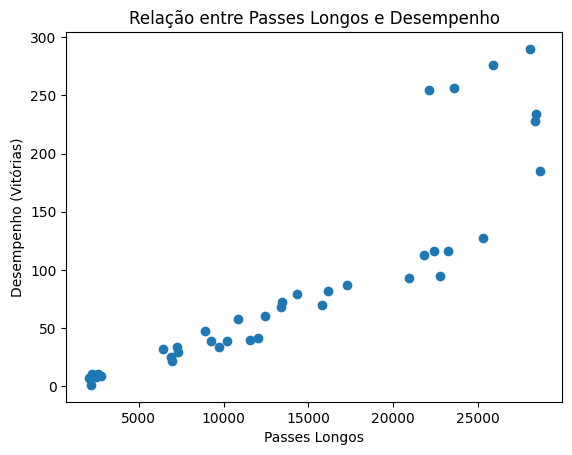

In [13]:
import matplotlib.pyplot as plt

passes_longos_por_equipe = premierleague.groupby('team')['total_long_balls'].sum()

desempenho = premierleague.groupby('team')['wins'].sum()

correlacao_passes_desempenho = passes_longos_por_equipe.corr(desempenho)

equipes_mais_passes_longos = passes_longos_por_equipe.sort_values(ascending=False)

print("Equipes que realizam mais passes longos:")
print(equipes_mais_passes_longos)

print("\nCorrelação entre passes longos e desempenho:", correlacao_passes_desempenho)

plt.scatter(passes_longos_por_equipe, desempenho)
plt.xlabel('Passes Longos')
plt.ylabel('Desempenho (Vitórias)')
plt.title('Relação entre Passes Longos e Desempenho')
plt.show()


Há uma associação significativa entre o número de passes longos realizados por uma equipe e seu desempenho, medido e o número de vitórias. Quando o número de passes longos aumenta, o desempenho da equipe tende a melhorar, e quando o número de passes longos diminui, o desempenho tende a piorar.

# **Existe uma correlação entre o número de interceptações feitas por uma equipe e sua defesa sólida?**

In [ ]:
correlacao_interceptacoes_defesa = premierleague['interception'].corr(premierleague['goals_conceded'])

print("Correlação entre número de interceptações e defesa sólida:", correlacao_interceptacoes_defesa)


Correlação entre número de interceptações e defesa sólida: 0.08365799993498563


 há uma associação mínima entre o número de interceptações feitas por uma equipe e sua capacidade defensiva, medida pelo número de gols concedidos.

# **Quais equipes têm o maior número de roubadas de bola?**



In [5]:
tackles_bem_sucedidos_por_equipe = premierleague.groupby('team')['total_tackle'].sum()

equipes_mais_tackles_bem_sucedidos = tackles_bem_sucedidos_por_equipe.sort_values(ascending=False)

print("Equipes com o maior número de tackles bem-sucedidos:")
print(equipes_mais_tackles_bem_sucedidos)

Equipes com o maior número de tackles bem-sucedidos:
team
Liverpool                   10247.0
Tottenham Hotspur            9461.0
Arsenal                      9298.0
Manchester City              9288.0
Chelsea                      9191.0
Manchester United            9093.0
Everton                      8818.0
West Ham United              8149.0
Aston Villa                  8143.0
Sunderland                   7956.0
Newcastle United             7715.0
Stoke City                   7085.0
Fulham                       6159.0
West Bromwich Albion         6157.0
Wigan Athletic               5893.0
Bolton Wanderers             5150.0
Blackburn Rovers             4668.0
Swansea City                 4586.0
Southampton                  4484.0
Hull City                    3688.0
Crystal Palace               3669.0
Portsmouth                   3607.0
Middlesbrough                3187.0
Leicester City               2967.0
Watford                      2824.0
Norwich City                 2651.0
Burnle

# **Qual é a eficácia das equipes em bloquear chutes adversários?**

In [8]:
eficacia_bloqueio_por_equipe = premierleague.groupby('team')['eficacia_bloqueio'].mean()

eficacia_bloqueio_por_equipe = eficacia_bloqueio_por_equipe.sort_values(ascending=False)
print("Eficácia média das equipes em bloquear chutes adversários (%):")
print(eficacia_bloqueio_por_equipe)


Eficácia média das equipes em bloquear chutes adversários (%):
team
Brighton and Hove Albion    49.479167
Burnley                     45.234362
Cardiff City                42.583732
Birmingham City             40.626194
Blackpool                   38.794727
Hull City                   38.306579
Stoke City                  37.958886
Sunderland                  35.666560
Derby County                34.308511
Aston Villa                 33.537461
Queens Park Rangers         33.089719
Charlton Athletic           33.014354
West Ham United             32.983732
Leicester City              32.601039
Huddersfield Town           32.596685
West Bromwich Albion        32.413838
Wolverhampton Wanderers     31.880422
Crystal Palace              31.815161
Swansea City                31.513733
Reading                     31.276651
Middlesbrough               31.207942
Norwich City                30.874737
Bolton Wanderers            30.242011
AFC Bournemouth             30.146423
Fulham              

# **Há uma correlação entre o número de clearance off-line e o número de gols sofridos?**

In [9]:
correlacao_clearance_gols = premierleague['clearance_off_line'].corr(premierleague['goals_conceded'])

print("Correlação entre clearance off-line e gols sofridos:", correlacao_clearance_gols)


Correlação entre clearance off-line e gols sofridos: 0.3341928316572894


Existe uma associação moderada entre o número de clearance off-line feitos por uma equipe e o número de gols que ela sofre. Nesse caso, uma correlação positiva sugere que à medida que o número de clearance off-line aumenta, o número de gols sofridos também tende a aumentar, e vice-versa.

# **Quais equipes têm o menor número de posses de bola perdidas?**

In [12]:
premierleague_teams = premierleague[premierleague['team'].isin(['Arsenal', 'Aston Villa', 'Brentford', 'Brighton and Hove Albion', 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester United', 'Newcastle United', 'Norwich City', 'Southampton', 'Tottenham Hotspur', 'Watford', 'West Ham United', 'Wolverhampton Wanderers'])]

posses_perdidas_por_equipe = premierleague_teams.groupby('team')['dispossessed'].sum()

equipes_menos_posses_perdidas = posses_perdidas_por_equipe.sort_values(ascending=False)

print("Equipes com o menor número de posses de bola perdidas:")
print(equipes_menos_posses_perdidas)


Equipes com o menor número de posses de bola perdidas:
team
Arsenal                     6011.0
Tottenham Hotspur           5906.0
Manchester City             5545.0
Manchester United           5520.0
Everton                     5500.0
Chelsea                     5418.0
Liverpool                   5408.0
Newcastle United            4765.0
West Ham United             4622.0
Aston Villa                 3976.0
Southampton                 2680.0
Crystal Palace              2131.0
Norwich City                1681.0
Burnley                     1547.0
Leicester City              1389.0
Wolverhampton Wanderers     1261.0
Watford                     1191.0
Brighton and Hove Albion     296.0
Name: dispossessed, dtype: float64


# **Qual é a eficácia dos goleiros em salvar pênaltis?**

In [14]:
eficacia_pênaltis = (premierleague['penalty_save'] / premierleague['penalty_conceded']) * 100

media_eficacia_pênaltis = eficacia_pênaltis.mean()

print("Eficácia média dos goleiros em salvar pênaltis: {:.2f}%".format(media_eficacia_pênaltis))


Eficácia média dos goleiros em salvar pênaltis: 17.24%


# **Existe uma correlação entre o número de grandes chances perdidas e o desempenho geral da equipe?**

In [15]:
correlacao = premierleague['big_chance_missed'].corr(premierleague['wins'])

print("Correlação entre grandes chances perdidas e desempenho geral da equipe:", correlacao)


Correlação entre grandes chances perdidas e desempenho geral da equipe: 0.604177909009563


Equipes que perdem menos grandes chances têm maior probabilidade de ter um desempenho melhor (mais vitórias) e vice-versa. Isso pode indicar a importância de converter grandes chances em gols para alcançar um melhor desempenho na Premier League.

# **Quais equipes têm o maior número de defesas de bola alta?**

In [16]:
defesas_bola_alta_por_equipe = premierleague.groupby('team')['total_high_claim'].sum()

mais_defesas_bola_alta = defesas_bola_alta_por_equipe.sort_values(ascending=False)

print("Equipes com o maior número de defesas de bola alta:")
print(mais_defesas_bola_alta)


Equipes com o maior número de defesas de bola alta:
team
Chelsea                     775.0
Stoke City                  703.0
Everton                     700.0
Arsenal                     678.0
Sunderland                  605.0
Aston Villa                 585.0
West Ham United             575.0
Tottenham Hotspur           570.0
Fulham                      558.0
Manchester City             542.0
Newcastle United            526.0
West Bromwich Albion        523.0
Liverpool                   516.0
Manchester United           471.0
Swansea City                457.0
Wigan Athletic              346.0
Blackburn Rovers            327.0
Portsmouth                  318.0
Crystal Palace              296.0
Bolton Wanderers            287.0
Wolverhampton Wanderers     283.0
Middlesbrough               270.0
Southampton                 247.0
Norwich City                237.0
Birmingham City             226.0
Hull City                   215.0
Watford                     208.0
Burnley                  

# **Qual é a eficácia dos goleiros em socar a bola para longe da área?**

In [17]:
premierleague['total_socadas_longe'] = premierleague['total_high_claim']

premierleague['total_socadas_longe_agarradas'] = premierleague['total_high_claim'] + premierleague['punches']

premierleague['eficacia_socar_longe'] = (premierleague['total_socadas_longe'] / premierleague['total_socadas_longe_agarradas']) * 100

media_eficacia_socar_longe = premierleague['eficacia_socar_longe'].mean()

print("Eficácia média dos goleiros em socar a bola para longe da área: {:.2f}%".format(media_eficacia_socar_longe))

Eficácia média dos goleiros em socar a bola para longe da área: 70.14%
